### Decision trees for regression problem

In [39]:
# importing the module
import pandas as pd

# importing dataset
dataset = pd.read_csv('house.csv')

# printing rows
dataset.head()

number_of_rooms  floor  area   latitude  longitude   price
0                1      1  58.0  38.585834  68.793715  330000
1                1     14  68.0  38.522254  68.749918  340000
2                3      8  50.0        NaN        NaN  700000
3                3     14  84.0  38.520835  68.747908  700000
4                3      3  83.0  38.564374  68.739419  415000

In [40]:
# removing null values
dataset.dropna(axis=0, inplace=True)

In [41]:
# checking for null values
dataset.isnull().sum()

number_of_rooms    0
floor              0
area               0
latitude           0
longitude          0
price              0
dtype: int64

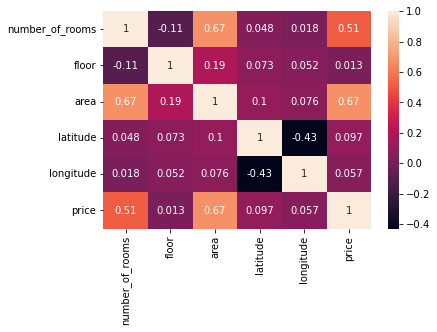

In [42]:
# importing the required modules
import seaborn as sns
import matplotlib.pyplot as plt


# finding the correlation
correlation_mat = dataset.corr()


# visualizing the matrix
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [43]:
# dividing into input and output
Input = dataset.drop('price', axis=1)
output = dataset['price']


In [44]:
# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split

# test size if 25%
X_train, X_test, y_train, y_test = train_test_split(Input,output,test_size=0.25)

In [45]:
# importing decision tree algorithm
from sklearn.tree import DecisionTreeRegressor

# initializing the model
regressor = DecisionTreeRegressor()

In [46]:

# providing the training dataset
regressor.fit(X_train,y_train)


DecisionTreeRegressor()

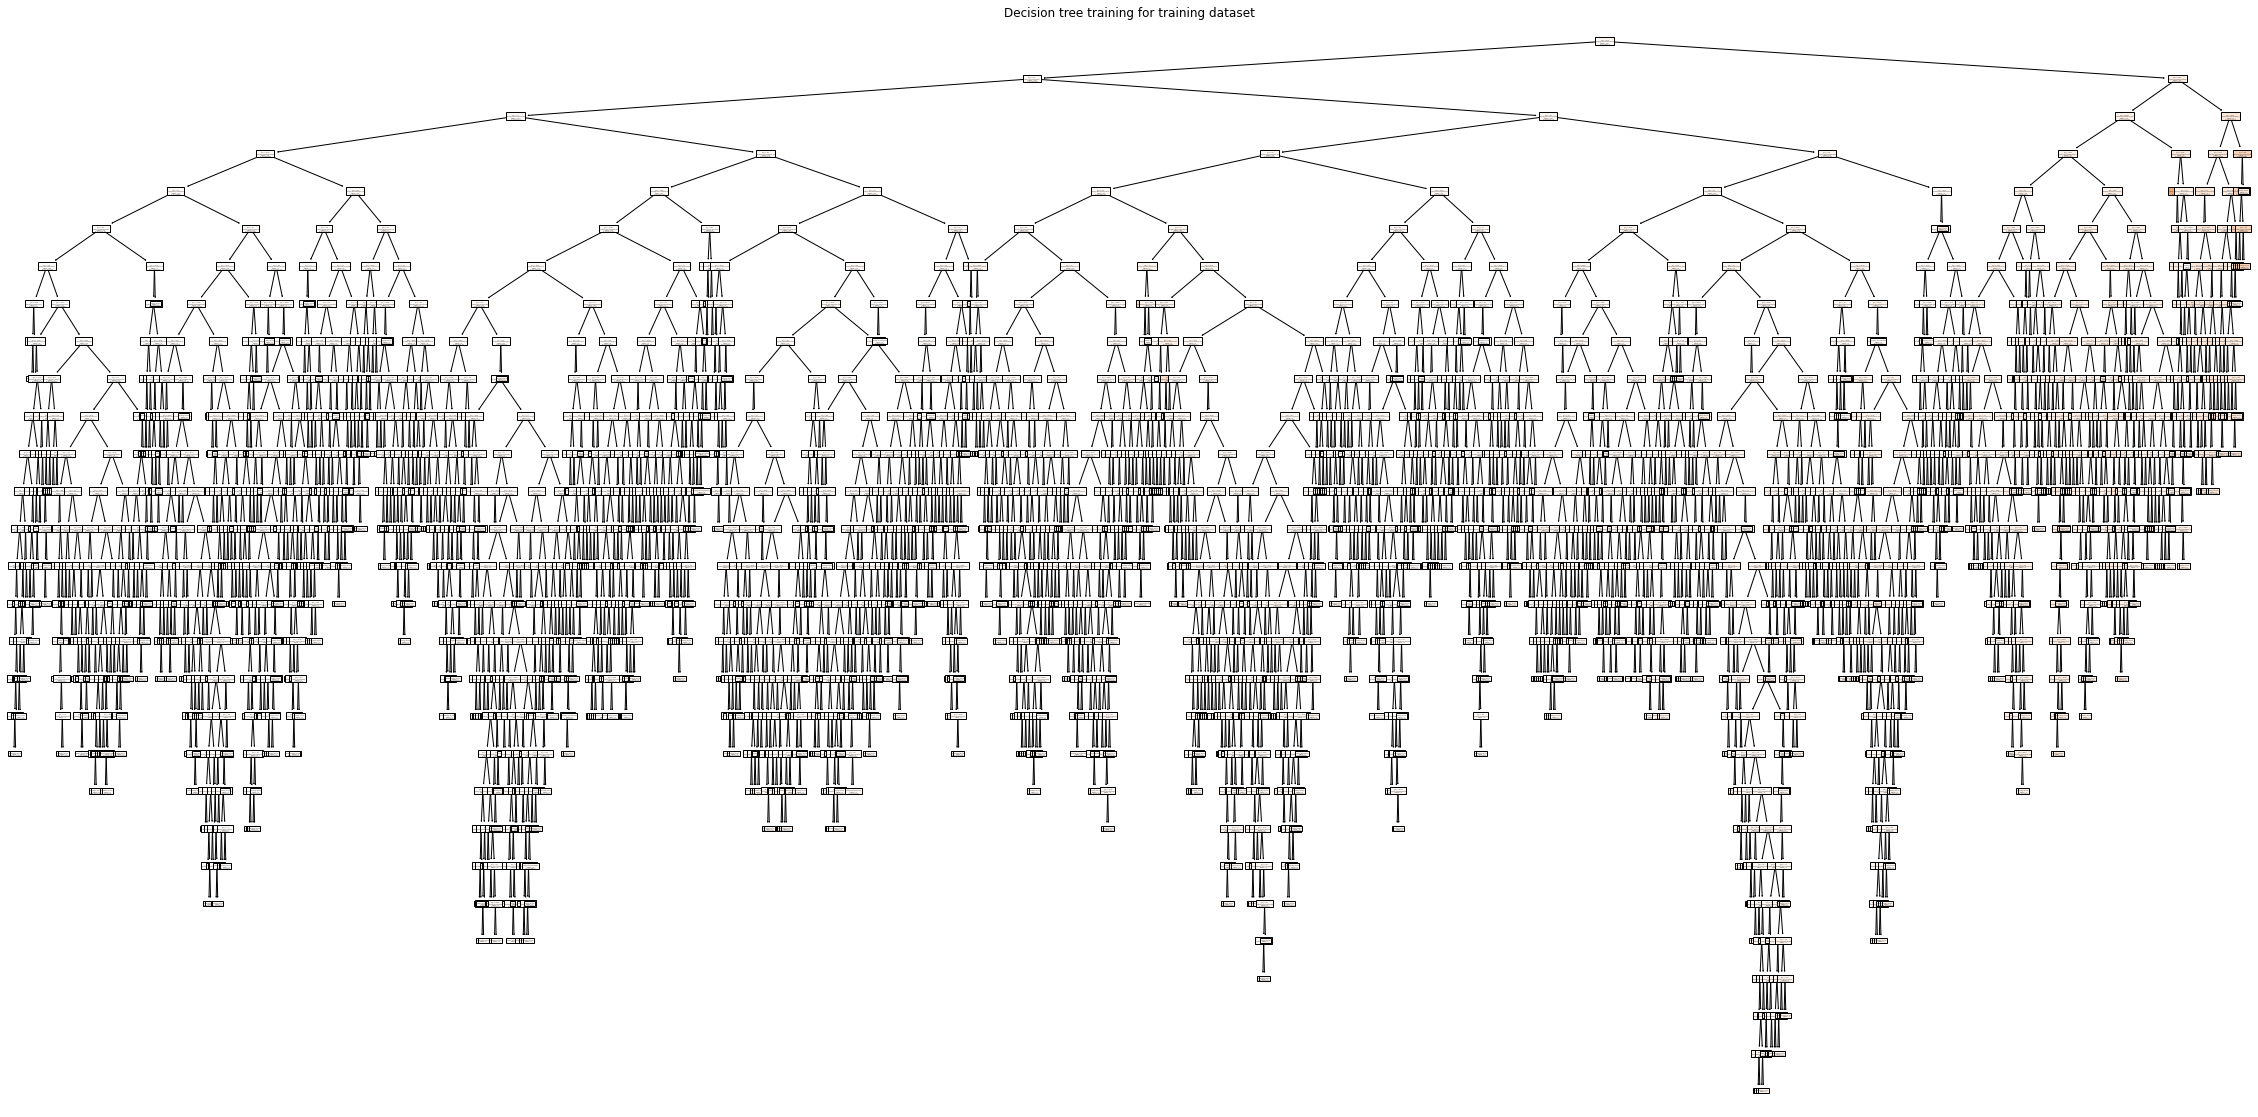

In [47]:
# importing the plot tree method
from sklearn.tree import plot_tree

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
plot_tree(regressor, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

In [49]:
# importing the tree
from sklearn import tree


# text based tree
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_2 <= 107.50
|   |--- feature_2 <= 61.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_4 <= 68.79
|   |   |   |   |--- feature_2 <= 41.50
|   |   |   |   |   |--- feature_1 <= 10.50
|   |   |   |   |   |   |--- feature_2 <= 23.00
|   |   |   |   |   |   |   |--- feature_3 <= 38.55
|   |   |   |   |   |   |   |   |--- feature_2 <= 19.50
|   |   |   |   |   |   |   |   |   |--- value: [30000.00]
|   |   |   |   |   |   |   |   |--- feature_2 >  19.50
|   |   |   |   |   |   |   |   |   |--- value: [80000.00]
|   |   |   |   |   |   |   |--- feature_3 >  38.55
|   |   |   |   |   |   |   |   |--- value: [136000.00]
|   |   |   |   |   |   |--- feature_2 >  23.00
|   |   |   |   |   |   |   |--- feature_3 <= 38.52
|   |   |   |   |   |   |   |   |--- feature_4 <= 68.73
|   |   |   |   |   |   |   |   |   |--- value: [320000.00]
|   |   |   |   |   |   |   |   |--- feature_4 >  68.73
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 68.76
|   |   |   |   |   |   | 

In [51]:
# making predictions
regressor.predict([[2, 2, 57, 38.8, 68.6]])

/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([700000.])

In [52]:
# making predictions on testing data
y_pred = regressor.predict(X_test)

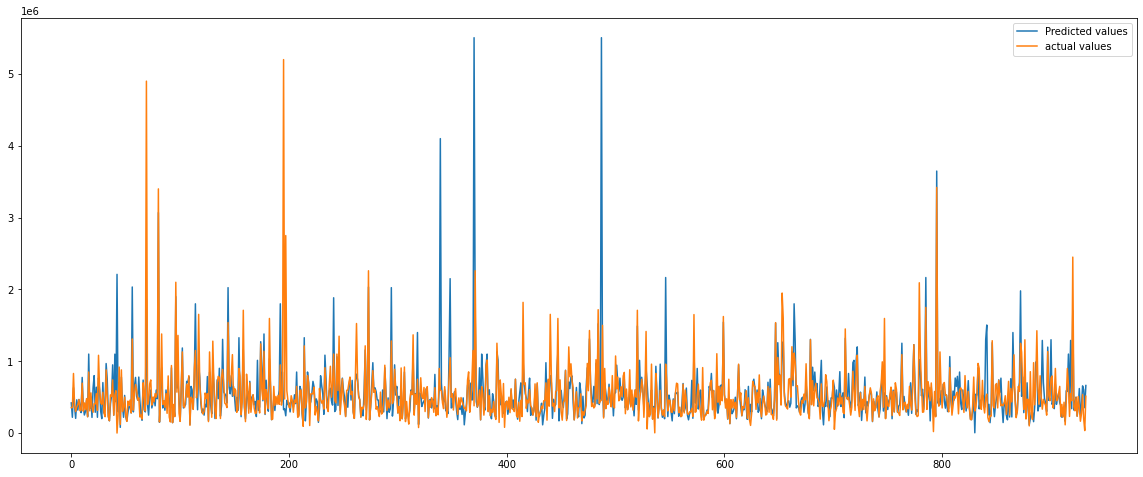

In [54]:
# importing the module
import matplotlib.pyplot as plt

# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_pred, label="Predicted values")
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.legend()
plt.show()

In [57]:
# Importing r2 
from sklearn.metrics import r2_score

# Evaluating the model
print('R-square score is :', r2_score(y_pred, y_test))

R-square score is : 0.11999757293626945


### Decision tree for classification problem

In [58]:
# importing dataset
from sklearn import datasets


# importing the dataset
iris = datasets.load_iris()


In [59]:
# importing required modules
import pandas as pd
import numpy as np

# converting to pandas dataframe
dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# heading of the dataset
dataset.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [60]:
#importing the required modules
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# creating subplot for the four attributes
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("sepal length (cm)",
                                    "petal length (cm)",
                                    "sepal width (cm)",
                                    "petal width (cm)")
                   )

# creating volin plot for sepal length
fig.append_trace(go.Violin(
    x=dataset['sepal length (cm)'],
    name='sepal length (cm)'
), row=1, col=1)


# creating volin plot for the sepal width
fig.append_trace(go.Violin(
    x=dataset['sepal width (cm)'],
    name='sepal width (cm)'
), row=2, col=1)


# creating  volin plot for the petal length
fig.append_trace(go.Violin(
    x=dataset['petal length (cm)'],
    name='petal length (cm)'
), row=1, col=2)


# creating volin plot for the petal width
fig.append_trace(go.Violin(
    x=dataset['petal width (cm)'],
    name='petal width (cm)'
), row=2, col=2)


# showing the graph
fig.update_layout(height=600, width=900, title_text="Violin Subplots", template="simple_white")
fig.show()

In [62]:
# splitting the dataset
X= dataset.drop('target', axis=1)
y = dataset['target']

In [63]:
# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split

# test size if 25%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [64]:
# importing decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

# inializing the model
classifer = DecisionTreeClassifier()

# providing the training dataset
classifer.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
# making predictions
y_pred =classifer.predict(X_test)

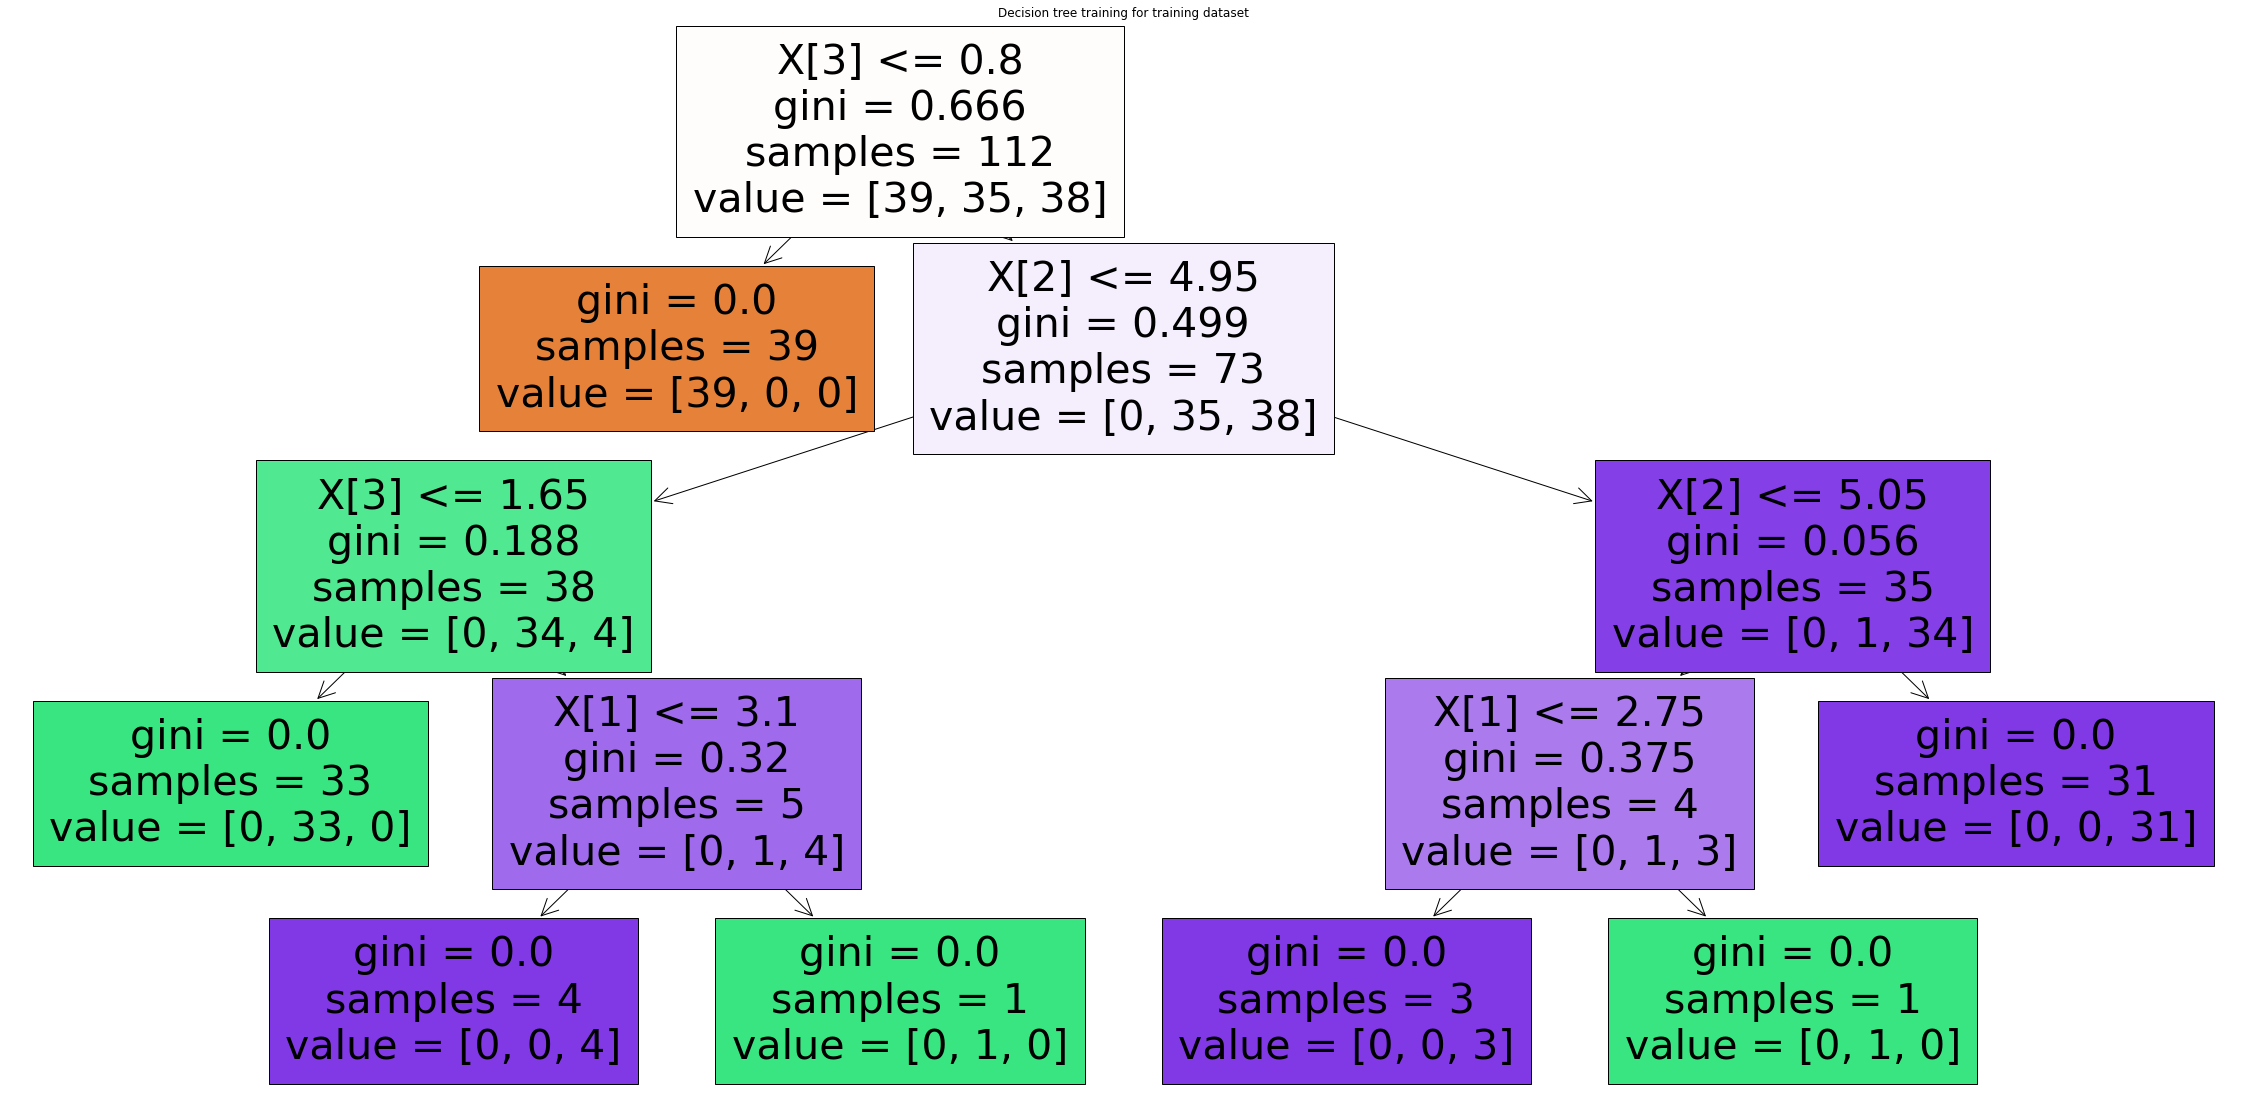

In [68]:
# importing the plot tree method
from sklearn.tree import DecisionTreeClassifier, plot_tree

# output size of decision tree
plt.figure(figsize=(40,20))

# plotting the tree
plot_tree(classifer, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

<AxesSubplot:>

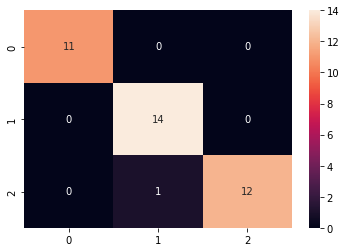

In [69]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

# Making the Confusion Matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm,annot=True)

In [70]:
# importing the required module and methods
from sklearn.metrics import accuracy_score
print(f'Accuracy-score: {accuracy_score(y_test, y_pred):.3f}')

Accuracy-score: 0.974
